In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('Tecate.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,25/01/2018,22:00,256,256,15.05,30.2,13.6,66,949.4,0.0,328.2
1,25/01/2018,23:00,267,265,11.39,34.3,12.8,72,949.7,0.0,127.8
2,26/01/2018,00:00,284,320,9.75,25.6,12.4,72,949.8,0.0,52.7
3,26/01/2018,01:00,265,244,10.98,24.6,11.2,85,950.2,0.0,4.0
4,26/01/2018,02:00,257,254,12.47,25.1,10.1,92,950.7,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,256,256,15.05,30.2,13.6,66,949.4,0.0,328.2,2018-01-25 22:00:00
1,267,265,11.39,34.3,12.8,72,949.7,0.0,127.8,2018-01-25 23:00:00
2,284,320,9.75,25.6,12.4,72,949.8,0.0,52.7,2018-01-26 00:00:00
3,265,244,10.98,24.6,11.2,85,950.2,0.0,4.0,2018-01-26 01:00:00
4,257,254,12.47,25.1,10.1,92,950.7,0.0,0.0,2018-01-26 02:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000
mean,102.794521,112.527397,9.698904,27.385616,16.882877,24.760274,951.821918,0.0,183.731507
std,71.743116,68.366275,5.085308,13.504865,5.678227,25.255468,1.952558,0.0,256.562691
min,8.000000,1.000000,1.560000,5.800000,5.000000,6.000000,946.100000,0.0,0.000000
25%,60.000000,80.000000,5.415000,15.525000,12.450000,12.000000,951.000000,0.0,0.000000
50%,83.500000,93.000000,9.515000,25.250000,17.900000,15.000000,952.350000,0.0,0.250000
75%,111.500000,119.000000,13.680000,37.525000,20.675000,22.000000,953.175000,0.0,351.275000
max,351.000000,339.000000,20.160000,58.800000,27.000000,96.000000,955.100000,0.0,728.700000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
94,62,103,12.65,48.9,24.3,10,951.7,0.0,728.7,2018-01-29 20:00:00
140,177,227,3.31,11.2,24.1,12,949.0,0.0,635.2,2018-01-31 18:00:00
145,230,211,12.01,22.2,24.9,13,946.1,0.0,339.5,2018-01-31 23:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       102.794521
DIRR       112.527397
VELS         9.698904
VELR        27.385616
TEMP        16.882877
HR          24.760274
PB         951.821918
PREC         0.000000
RAD-SOL    183.731507
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

16.882876712328766

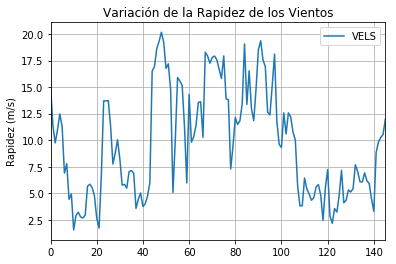

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

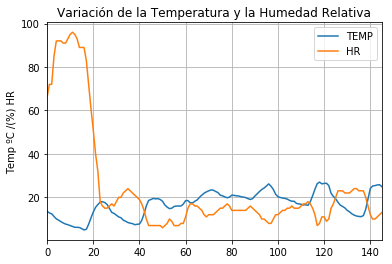

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

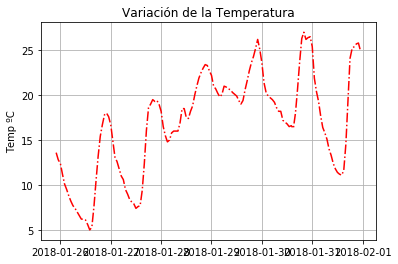

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="r-.")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [15]:
df.head(35)

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,256,256,15.05,30.2,13.6,66,949.4,0.0,328.2,2018-01-25 22:00:00
1,267,265,11.39,34.3,12.8,72,949.7,0.0,127.8,2018-01-25 23:00:00
2,284,320,9.75,25.6,12.4,72,949.8,0.0,52.7,2018-01-26 00:00:00
3,265,244,10.98,24.6,11.2,85,950.2,0.0,4.0,2018-01-26 01:00:00
4,257,254,12.47,25.1,10.1,92,950.7,0.0,0.0,2018-01-26 02:00:00
5,241,250,11.30,22.1,9.5,92,951.1,0.0,0.0,2018-01-26 03:00:00
6,242,239,6.91,20.7,8.8,92,951.6,0.0,0.0,2018-01-26 04:00:00
7,236,222,7.79,14.4,8.2,91,952.1,0.0,0.0,2018-01-26 05:00:00
8,250,236,4.44,12.1,7.7,91,952.3,0.0,0.0,2018-01-26 06:00:00
9,237,236,4.94,8.6,7.4,93,952.7,0.0,0.0,2018-01-26 07:00:00


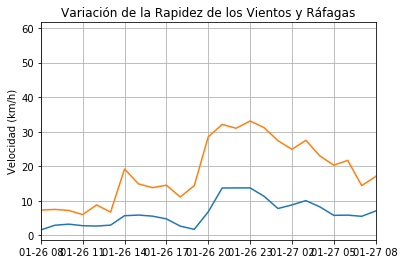

In [16]:
# INCLUIR EN EL REPORTE DE LaTeX
# Gráfica de Velocidad de los Vientos y Velocidad de las Ráfagas
plt.figure() #Define el nombre del gráfico

ValorX = df[["FECHA"]] #Podemos definir aquello en X
ValorY = df[['VELS','VELR']] #Podemos definir aquello en Y
plt.plot(ValorX,ValorY) #Valores para Y y X

plt.legend(loc='best') #Ubicación de la leyenda
plt.title("Variación de la Rapidez de los Vientos y Ráfagas")
plt.ylabel("Velocidad (km/h)")

plt.xlim(['2018-01-26 08:00:00','2018-01-27 08:00:00']) #Limites para el eje X

plt.grid(True)
plt.show()

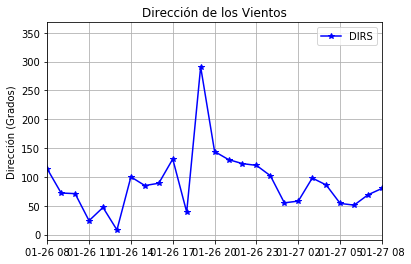

In [17]:
# INCLUIR EN EL REPORTE DE LaTeX
# Gráfica de la Dirección de los Vientos
        #plt.figure()

    #ValorX = df[['FECHA']]
    #ValorY = df[['DIRS']]
    #plt.plot(ValorX, ValorY)
    
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-*")

plt.legend(loc='best')
plt.title("Dirección de los Vientos")
plt.ylabel("Dirección (Grados)")

plt.xlim(['2018-01-26 08:00:00','2018-01-27 08:00:00'])

plt.grid(True)
plt.show()

In [18]:
#Cambia el nombre de una columna en los datos
df.rename(columns={'RAD-SOL': 'RADSOL'}, inplace=True) #inplace, reemplaza la columna existente

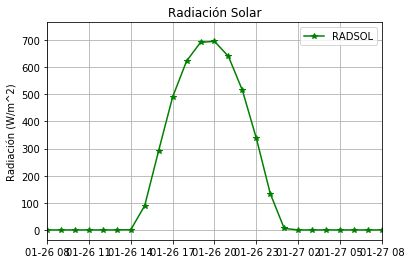

In [19]:
# INCLUIR EN EL REPORTE DE LaTeX
# Gráfica de la Radiación Solar
plt.figure()

plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="g-*")

plt.xlim(['2018-01-26 08:00:00','2018-01-27 08:00:00'])

plt.legend(loc='best')
plt.title("Radiación Solar")
plt.ylabel("Radiación (W/m^2)")
plt.grid(True)
plt.show()

In [20]:
DeltaTemp = df.loc[10:34,['TEMP','FECHA']]

DeltaTemp.head(40)

,TEMP,FECHA
10,7.0,2018-01-26 08:00:00
11,6.6,2018-01-26 09:00:00
12,6.2,2018-01-26 10:00:00
13,6.2,2018-01-26 11:00:00
14,6.1,2018-01-26 12:00:00
15,5.6,2018-01-26 13:00:00
16,5.0,2018-01-26 14:00:00
17,5.3,2018-01-26 15:00:00
18,7.6,2018-01-26 16:00:00
19,10.5,2018-01-26 17:00:00


In [21]:
TempMin = DeltaTemp.min()
TempMax = DeltaTemp.max()

TempMax - TempMin

TEMP                  13
FECHA    1 days 00:00:00
dtype: object

In [22]:
df.describe() #De nuevo

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000
mean,102.794521,112.527397,9.698904,27.385616,16.882877,24.760274,951.821918,0.0,183.731507
std,71.743116,68.366275,5.085308,13.504865,5.678227,25.255468,1.952558,0.0,256.562691
min,8.000000,1.000000,1.560000,5.800000,5.000000,6.000000,946.100000,0.0,0.000000
25%,60.000000,80.000000,5.415000,15.525000,12.450000,12.000000,951.000000,0.0,0.000000
50%,83.500000,93.000000,9.515000,25.250000,17.900000,15.000000,952.350000,0.0,0.250000
75%,111.500000,119.000000,13.680000,37.525000,20.675000,22.000000,953.175000,0.0,351.275000
max,351.000000,339.000000,20.160000,58.800000,27.000000,96.000000,955.100000,0.0,728.700000


In [23]:
TempMax

TEMP                      18
FECHA    2018-01-27 08:00:00
dtype: object

In [24]:
TempMin

TEMP                       5
FECHA    2018-01-26 08:00:00
dtype: object

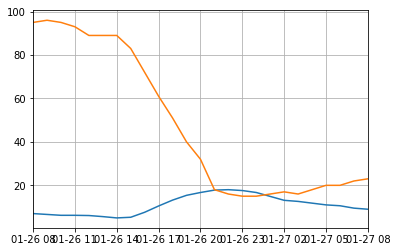

In [25]:
plt.figure() #Define el nombre del gráfico

ValorX = df[["FECHA"]] #Podemos definir aquello en X
ValorY = df[['TEMP','HR']] #Podemos definir aquello en Y
plt.plot(ValorX,ValorY) #Valores para Y y X

plt.xlim(['2018-01-26 08:00:00','2018-01-27 08:00:00']) #Limites para el eje X

plt.grid(True)
plt.show()